# SVM
In this notebook, we will make use of SVM. Contrary to what has been done, we will not implement any algorithm. Instead, we are going to make some case studies using scikit learn.

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets
from matplotlib import pyplot as plt
%matplotlib inline
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

## Separable Data
A small test on Example 8.2 of Learning From Data

---

In [2]:
x = np.array([[0,0],[2,2],[2,0],[3,0]])
y = np.array([-1,-1,1,1])
prim=SVC(kernel='linear')
prim.fit(x,y)
print(prim.coef_.ravel())
print(prim.intercept_.ravel())

[ 1. -1.]
[-1.]


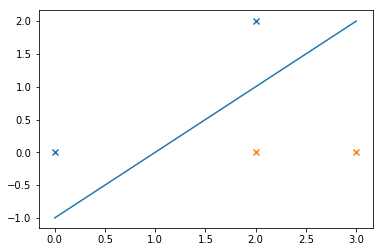

In [3]:
coefs=prim.coef_.ravel()
intercept=prim.intercept_.ravel()
A=-coefs[0]/coefs[1]
B=-intercept/coefs[1]
xx = np.linspace(0,3,100)
yy = A*xx+B
plt.scatter(x[(y==-1),0],x[(y==-1),1],marker="x")
plt.scatter(x[(y==1),0],x[(y==1),1],marker="x")
plt.plot(xx,yy)
plt.show()

Now advancing to the iris dataset. Only the first two features of the first 100 samples.

---

In [4]:
irisX = iris.data[0:100,0:2]
irisY = iris.target[0:100]
irisSVM = SVC(C=1e6,kernel='linear')
irisSVM.fit(irisX,irisY)
print(irisSVM.coef_.ravel())
print(irisSVM.intercept_.ravel())

[ 6.31777572 -5.26481134]
[-17.32124155]


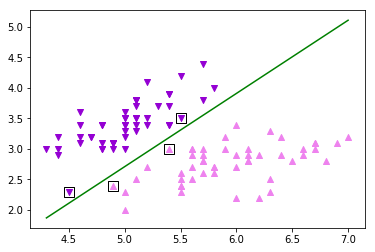

In [5]:
irisCoefs = irisSVM.coef_.ravel()
irisIntercept = irisSVM.intercept_.ravel()
irisA = -irisCoefs[0]/irisCoefs[1]
irisB = -irisIntercept/irisCoefs[1]
minX = np.min(irisX[:,0])
maxX = np.max(irisX[:,0])
minY = np.min(irisX[:,1])
maxY = np.max(irisX[:,1])
xx = np.linspace(minX,maxX,100)
yy = irisA*xx + irisB
plt.scatter(irisX[(irisY==0),0],irisX[(irisY==0),1],marker="v",c='darkviolet')
plt.scatter(irisX[(irisY==1),0],irisX[(irisY==1),1],marker="^",c='violet')
plt.scatter(irisX[irisSVM.support_,0],irisX[irisSVM.support_,1],marker='s',facecolors='none',edgecolors='k',s=100)
plt.plot(xx,yy,c='g')
plt.show()

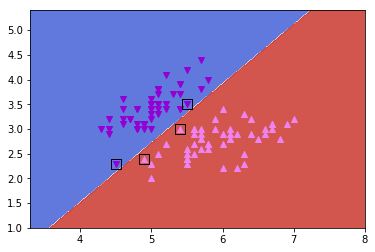

In [6]:
xx = np.linspace(minX-1,maxX+1,300)
yy = np.linspace(minY-1,maxY+1,200)
XX,YY = np.meshgrid(xx,yy)
ZZ = irisSVM.predict(np.c_[XX.ravel(),YY.ravel()])
ZZ = ZZ.reshape(XX.shape)
plt.contourf(XX,YY,ZZ, cmap=plt.cm.coolwarm, alpha=0.9)
plt.scatter(irisX[(irisY==0),0],irisX[(irisY==0),1],marker="v",c='darkviolet')
plt.scatter(irisX[(irisY==1),0],irisX[(irisY==1),1],marker="^",c='violet')
plt.scatter(irisX[irisSVM.support_,0],irisX[irisSVM.support_,1],marker='s',facecolors='none',edgecolors='k',s=100)
plt.show()

Still on separable data, Let's try using the same dataset, but with different kernels.

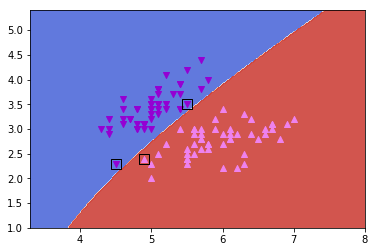

In [7]:
irisPoly = SVC(C=1e6, kernel='poly', degree=2, gamma=0.5, coef0=0)
irisPoly.fit(irisX,irisY)
xx = np.linspace(minX-1,maxX+1,300)
yy = np.linspace(minY-1,maxY+1,200)
XX,YY = np.meshgrid(xx,yy)
ZZ = irisPoly.predict(np.c_[XX.ravel(),YY.ravel()])
ZZ = ZZ.reshape(XX.shape)
plt.contourf(XX,YY,ZZ, cmap=plt.cm.coolwarm, alpha=0.9)
plt.scatter(irisX[(irisY==0),0],irisX[(irisY==0),1],marker="v",c='darkviolet')
plt.scatter(irisX[(irisY==1),0],irisX[(irisY==1),1],marker="^",c='violet')
plt.scatter(irisX[irisPoly.support_,0],irisX[irisPoly.support_,1],marker='s',facecolors='none',edgecolors='k',s=100)
plt.show()

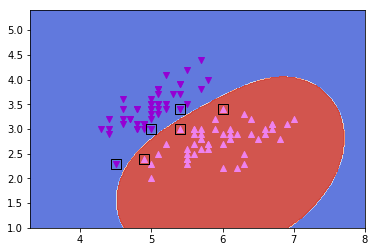

In [8]:
irisRBF = SVC(C=1e6, gamma=0.5)
irisRBF.fit(irisX,irisY)
xx = np.linspace(minX-1,maxX+1,300)
yy = np.linspace(minY-1,maxY+1,200)
XX,YY = np.meshgrid(xx,yy)
ZZ = irisRBF.predict(np.c_[XX.ravel(),YY.ravel()])
ZZ = ZZ.reshape(XX.shape)
plt.contourf(XX,YY,ZZ, cmap=plt.cm.coolwarm, alpha=0.9)
plt.scatter(irisX[(irisY==0),0],irisX[(irisY==0),1],marker="v",c='darkviolet')
plt.scatter(irisX[(irisY==1),0],irisX[(irisY==1),1],marker="^",c='violet')
plt.scatter(irisX[irisRBF.support_,0],irisX[irisRBF.support_,1],marker='s',facecolors='none',edgecolors='k',s=100)
plt.show()

## Non Separable Data

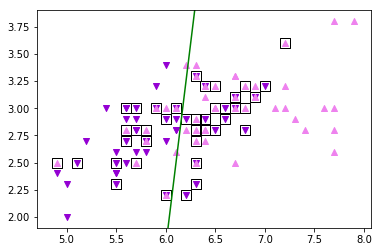

In [9]:
nsirisX = iris.data[50:150,0:2]
nsirisY = iris.target[50:150]
nsirisSVM = SVC(C=1e6, kernel='linear')
nsirisSVM.fit(nsirisX,nsirisY)
irisCoefs = nsirisSVM.coef_.ravel()
irisIntercept = nsirisSVM.intercept_.ravel()
irisA = -irisCoefs[0]/irisCoefs[1]
irisB = -irisIntercept/irisCoefs[1]
nsminX = np.min(nsirisX[:,0])
nsmaxX = np.max(nsirisX[:,0])
nsminY = np.min(nsirisX[:,1])
nsmaxY = np.max(nsirisX[:,1])
xx = np.linspace(nsminX,nsmaxX,100)
yy = irisA*xx + irisB
ax = plt.subplot(111)
ax.scatter(nsirisX[(nsirisY==1),0],nsirisX[(nsirisY==1),1],marker="v",c='darkviolet')
ax.scatter(nsirisX[(nsirisY==2),0],nsirisX[(nsirisY==2),1],marker="^",c='violet')
ax.scatter(nsirisX[nsirisSVM.support_,0],nsirisX[nsirisSVM.support_,1],marker='s',facecolors='none',edgecolors='k',s=100)
ax.plot(xx,yy,c='g')
ax.set(ylim=[nsminY-0.1,nsmaxY+0.1])
plt.show()

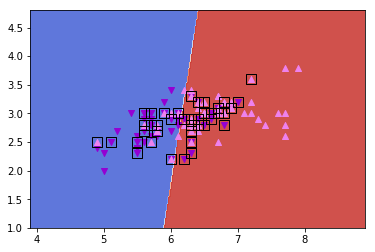

In [10]:
xx = np.linspace(nsminX-1,nsmaxX+1,300)
yy = np.linspace(nsminY-1,nsmaxY+1,200)
XX,YY = np.meshgrid(xx,yy)
ZZ = nsirisSVM.predict(np.c_[XX.ravel(),YY.ravel()])
ZZ = ZZ.reshape(XX.shape)
plt.contourf(XX,YY,ZZ, cmap=plt.cm.coolwarm, alpha=0.9)
plt.scatter(nsirisX[(nsirisY==1),0],nsirisX[(nsirisY==1),1],marker="v",c='darkviolet')
plt.scatter(nsirisX[(nsirisY==2),0],nsirisX[(nsirisY==2),1],marker="^",c='violet')
plt.scatter(nsirisX[nsirisSVM.support_,0],nsirisX[nsirisSVM.support_,1],marker='s',facecolors='none',edgecolors='k',s=100)
plt.show()

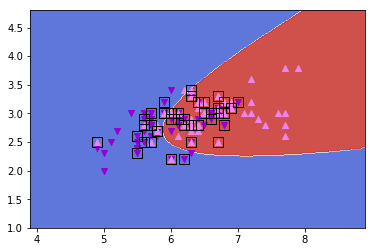

In [11]:
nsirisPoly = SVC(C=1e6, kernel='poly', degree=3, gamma=0.5, coef0=0)
nsirisPoly.fit(nsirisX,nsirisY)
xx = np.linspace(nsminX-1,nsmaxX+1,300)
yy = np.linspace(nsminY-1,nsmaxY+1,200)
XX,YY = np.meshgrid(xx,yy)
ZZ = nsirisPoly.predict(np.c_[XX.ravel(),YY.ravel()])
ZZ = ZZ.reshape(XX.shape)
plt.contourf(XX,YY,ZZ, cmap=plt.cm.coolwarm, alpha=0.9)
plt.scatter(nsirisX[(nsirisY==1),0],nsirisX[(nsirisY==1),1],marker="v",c='darkviolet')
plt.scatter(nsirisX[(nsirisY==2),0],nsirisX[(nsirisY==2),1],marker="^",c='violet')
plt.scatter(nsirisX[nsirisPoly.support_,0],nsirisX[nsirisPoly.support_,1],marker='s',facecolors='none',edgecolors='k',s=100)
plt.show()

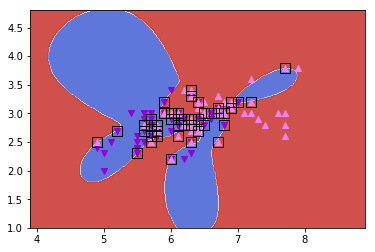

In [22]:
nsirisRBF = SVC(C=1e6, gamma=1)
nsirisRBF.fit(nsirisX,nsirisY)
xx = np.linspace(nsminX-1,nsmaxX+1,300)
yy = np.linspace(nsminY-1,nsmaxY+1,200)
XX,YY = np.meshgrid(xx,yy)
ZZ = nsirisRBF.predict(np.c_[XX.ravel(),YY.ravel()])
ZZ = ZZ.reshape(XX.shape)
plt.contourf(XX,YY,ZZ, cmap=plt.cm.coolwarm, alpha=0.9)
plt.scatter(nsirisX[(nsirisY==1),0],nsirisX[(nsirisY==1),1],marker="v",c='darkviolet')
plt.scatter(nsirisX[(nsirisY==2),0],nsirisX[(nsirisY==2),1],marker="^",c='violet')
plt.scatter(nsirisX[nsirisRBF.support_,0],nsirisX[nsirisRBF.support_,1],marker='s',facecolors='none',edgecolors='k',s=100)
plt.show()